# Meta-analysis of Reproducibility of Data Science Research
## Quantitative Analysis of the reports.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import levene
from scipy.stats import ttest_ind


Here we load the before prepared dataset, as it was defined based on the found issues from the different reports.

In [91]:
data = pd.read_csv('data.csv', encoding = 'utf-8', delimiter=";")
data = data[data["Name"]=="Meta"]
data = data.drop(columns=["Reproduction Year", "Reproducer","Assumptions"])
data["id"], _= pd.factorize(data["Name"])
data = data
data

,Name,Original_Name,Year,Conference,Code not provided,Code partially not provided,Faulty Code provided,Information about Software Versions missing,Data not provided,Data is partially not provided,...,Specific Hardware and Software Setup necessary,Sum,Platform,Research Objective,Implementation,Method,Actor,Data,Assumptions,id
2,Meta,A Framework for Analyzing the Impact of Missin...,2020,CIKM,0,0,0,0,0,0,...,1,2,0,0,0,0,1,0,NaN,0
6,Meta,Collaborative Memory Network for Recommendatio...,2018,SIGIR,0,1,0,1,0,1,...,1,5,1,0,0,0,1,0,NaN,0
10,Meta,CosRec: 2D Convolutional Neural Networks for S...,2019,CIKM,0,1,0,0,0,0,...,1,4,0,0,0,0,1,0,NaN,0
14,Meta,Cross-Lingual Document Retrieval Using Regular...,2018,ECIR,0,0,0,1,1,0,...,0,4,0,0,0,0,1,1,NaN,0
18,Meta,Crowdsourcing Truthfulness: The Impact of Judg...,2020,ECIR,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,NaN,0
21,Meta,Deep Learning for Detecting Cyberbullying Acro...,2018,ECIR,0,0,1,1,0,0,...,0,5,1,0,1,0,1,0,NaN,0
25,Meta,Deep Learning over Multi-field Categorical Data,2016,ECIR,0,0,1,0,1,0,...,1,4,0,0,0,0,1,0,NaN,0
29,Meta,Entity Set Search of Scientific Literature: An...,2018,ECIR,0,0,1,0,0,1,...,1,6,0,0,0,0,1,0,NaN,0
33,Meta,FA*IR: A Fair Top-k Ranking Algorithm,2017,CIKM,0,0,1,0,0,0,...,0,2,1,0,0,0,1,0,NaN,0
36,Meta,FANG: Leveraging Social Context for Fake News ...,2020,CIKM,0,0,0,0,0,0,...,0,3,1,0,0,0,1,0,NaN,0


In [89]:
data.describe()

,Year,Code not provided,Code partially not provided,Faulty Code provided,Information about Software Versions missing,Data not provided,Data is partially not provided,Metadata not provided,Comparison Metrics or Baselines not used,Experimental Setup not described,...,Cultural Context differs,Specific Hardware and Software Setup necessary,Sum,Platform,Research Objective,Implementation,Method,Actor,Data,id
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.0,17.000000,17.000000,17.000000,17.0,17.000000,17.0,17.0,17.000000,17.0
mean,2018.117647,0.058824,0.117647,0.352941,0.470588,0.117647,0.117647,0.176471,0.294118,0.176471,...,0.0,0.352941,3.117647,0.294118,0.0,0.235294,0.0,1.0,0.117647,0.0
std,1.495090,0.242536,0.332106,0.492592,0.514496,0.332106,0.332106,0.392953,0.469668,0.392953,...,0.0,0.492592,1.576482,0.469668,0.0,0.437237,0.0,0.0,0.332106,0.0
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
25%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,2.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
50%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,3.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
75%,2019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,1.000000,4.000000,1.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
max,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,6.000000,1.000000,0.0,1.000000,0.0,1.0,1.000000,0.0


The most common issues of all papers are most likely, that they have not been described their workflow and the used software in detail, as well as that it often has not been compared with statistical testing or to given baselines.

In [87]:
#most common issues ordered by how many times they were identified
issues = data.iloc[:, 4:18]
most_common_issues = issues.sum().sort_values(ascending=False)
most_common_issues

Experiment Workflow incomplete                    12.0
Information about Software Versions missing        8.0
Specific Hardware and Software Setup necessary     6.0
Faulty Code provided                               6.0
Comparison Metrics or Baselines not used           5.0
Results differ significantly                       3.0
Experimental Setup not described                   3.0
Metadata not provided                              3.0
Data is partially not provided                     2.0
Data not provided                                  2.0
Code partially not provided                        2.0
Inconsistencies in Paper, Code and Data            1.0
Code not provided                                  1.0
Cultural Context differs                           0.0
dtype: float64

In [73]:
most_common_issues_percent = most_common_issues /72 * 100
most_common_issues_percent

Experiment Workflow incomplete                    16.666667
Information about Software Versions missing       11.111111
Specific Hardware and Software Setup necessary     8.333333
Faulty Code provided                               8.333333
Comparison Metrics or Baselines not used           6.944444
Results differ significantly                       4.166667
Experimental Setup not described                   4.166667
Metadata not provided                              4.166667
Data is partially not provided                     2.777778
Data not provided                                  2.777778
Code partially not provided                        2.777778
Inconsistencies in Paper, Code and Data            1.388889
Code not provided                                  1.388889
Cultural Context differs                           0.000000
dtype: float64

Here we define a dataset with just the generalized categories, instead of the fine grained analysis from before

In [74]:
#Creating a dataframe just with the more generalized errors
super_issues = pd.DataFrame()
super_issues["conference"] = data["Conference"]
super_issues["code"] = data["Code not provided"] + data["Code partially not provided"] + data["Information about Software Versions missing"] + data["Faulty Code provided"] + data["Specific Hardware and Software Setup necessary"]
super_issues["data"] = data["Data not provided"] + data["Data is partially not provided"] + data["Metadata not provided"]
super_issues["information"] = data["Inconsistencies in Paper, Code and Data"] + data["Results differ significantly"] + data["Experimental Setup not described"] + data["Comparison Metrics or Baselines not used"] + data["Experiment Workflow incomplete"]

It can clearly been seen that most problems in reproduction are based on insufficient information and that from this information the original workflow and experiment cannot be precisely reconstructed.

In [75]:
#normalized problems found per paper in conference
super_issues_grouped_normalized = super_issues.groupby("conference").sum() / super_issues.groupby("conference").count()
super_issues_grouped = super_issues.groupby("conference").sum()

print(super_issues.groupby("conference").sum().sum())

print(super_issues.groupby("conference").sum().sum()/72 * 100)




code           23.0
data            7.0
information    24.0
dtype: float64
code           31.944444
data            9.722222
information    33.333333
dtype: float64


Next we want to look into the data on a per conference level. Here we possibly have a bias, as the set consists only of 21 papers, where more than half consists of ECIR papers and a quarter on CIKM papers, this means outliers will have a larger effect on the papers overall.

In [76]:
#number of errors per conference
super_issues_grouped.T.sum()



conference
CIKM     18.0
ECIR     25.0
SIGIR    11.0
dtype: float64

In [77]:
#number of errors per paper per conference
super_issues_grouped_normalized.T.sum()

conference
CIKM     3.000000
ECIR     3.125000
SIGIR    3.666667
dtype: float64

In [78]:
super_issues_grouped.T/super_issues_grouped.sum(axis=1)

conference,CIKM,ECIR,SIGIR
code,0.444444,0.4,0.454545
data,0.000000,0.2,0.181818
information,0.555556,0.4,0.363636


C:\Users\morit\AppData\Local\Temp\ipykernel_18788\1519011953.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


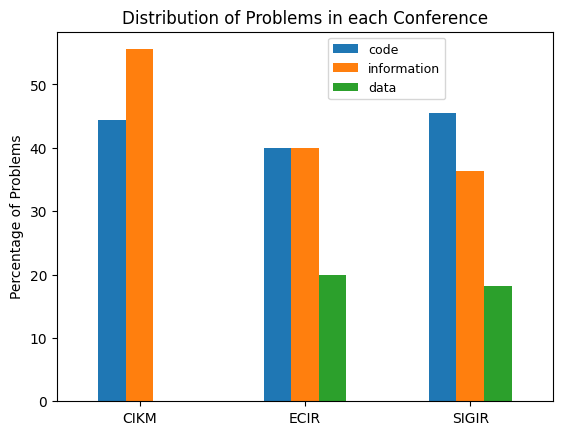

In [79]:
#super_issues_grouped.plot(y=["code","information","data"], kind="bar", title="Problems per Conference", rot=0)

super_issues_percent = (super_issues_grouped.T/super_issues_grouped.sum(axis=1))*100
super_issues_percent.T.plot(y=["code","information","data"], kind="bar", title="Distribution of Problems in each Conference", rot=0)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_label_text('foo')
x_label = x_axis.get_label()
x_label.set_visible(False)
ax1.set_ylabel("Percentage of Problems")
plt.legend(loc='upper center',  prop={'size': 9}, bbox_to_anchor=(0.665, 1))
plt.show()
plt.close()

In [80]:
#Number of papers per conference
super_issues[["conference", "code"]].groupby("conference").count()

,code
conference,
CIKM,6
ECIR,8
SIGIR,3


In [81]:
super_issues = pd.DataFrame()
super_issues["year"] = data["Year"]
super_issues["conference"] = data["Conference"]
super_issues["code"] = data["Code not provided"] + data["Code partially not provided"] + data["Information about Software Versions missing"] + data["Faulty Code provided"] + data["Specific Hardware and Software Setup necessary"]
super_issues["data"] = data["Data not provided"] + data["Data is partially not provided"] + data["Metadata not provided"]
super_issues["information"] = data["Inconsistencies in Paper, Code and Data"] + data["Results differ significantly"] + data["Experimental Setup not described"] + data["Comparison Metrics or Baselines not used"] + data["Experiment Workflow incomplete"]

Next we want to look into how the data evolves over years, but again we need to specify that the data cannot be taken without a grain of salt, as with such low numbers of papers analyzed it is nearly impossible to get a high significance. 

In [82]:
grouped_per_year = super_issues.groupby("year").sum()
grouped_per_year["number"] = super_issues.groupby("year").count()["conference"]
grouped_per_year["code"] = grouped_per_year["code"] / grouped_per_year["number"]
grouped_per_year["data"] = grouped_per_year["data"] / grouped_per_year["number"]
grouped_per_year["information"] = grouped_per_year["information"] / grouped_per_year["number"]
grouped_per_year["all"] = grouped_per_year["code"] + grouped_per_year["data"] + grouped_per_year["information"]


In [83]:
grouped_per_year

,code,data,information,number,all
year,,,,,
2015,0.000000,0.000000,0.000000,1,0.000000
2016,2.500000,0.500000,1.000000,2,4.000000
2017,1.000000,0.000000,2.000000,1,3.000000
2018,1.714286,0.714286,1.714286,7,4.142857
2019,1.500000,0.000000,1.500000,2,3.000000
2020,0.500000,0.250000,1.250000,4,2.000000


When looking at the line chart, it can be clearly seen that papers are from 2017 onwards better documented and make the reproduction easier. With the small number of papers this does not seem to be really informative as it can be a lucky sample as well.

<AxesSubplot:title={'center':'Problems per Paper per year'}, xlabel='year'>

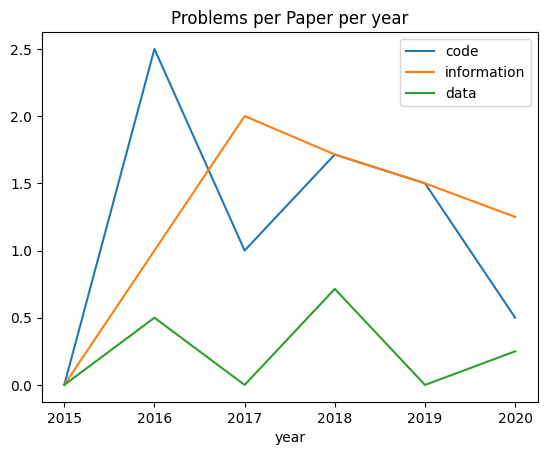

In [84]:
grouped_per_year.plot(y=["code","information","data"], kind="line", title="Problems per Paper per year", rot=0)